In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(4)

## 1. Visualization of data

In [3]:
# create ground truth function
X_truth = np.arange(0.06,10,0.01).reshape(994, 1) + 5
y_truth = X_truth + X_truth * np.sin(X_truth)

In [4]:
# simulate sampling
n_sample = 6
X = np.random.rand(n_sample, 1) * 10 + 5
X = np.sort(X)

In [5]:
y = X + X * np.sin(X) + 2*np.random.randn(n_sample, 1)

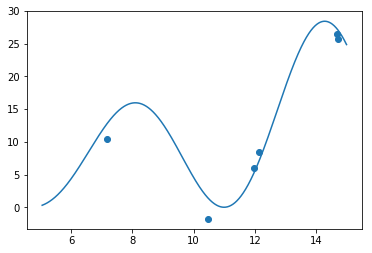

In [6]:
plt.scatter(X, y)
plt.plot(X_truth, y_truth)

## 2. Linear Regression

### 2-1. Derivation

Let $d$-dimensional input be $\mathrm{X}\in\mathbb{R}^{d \times n}$ and observation $\mathbf{y}\in\mathbb{R}^{n}$.
Here, we denote $\mathrm{X}=\left(\mathbf{x}_{1} \mathbf{x}_{2} \cdots \mathbf{x}_{n}\right)$, $\mathbf{x}_{i}$ representing $i$-th input data vector.  
We can use arbitrary multidimensional data; $\mathbf{x}_{i}$ can be set of (scalar-valued) signals observed at $d$ sensors, $d$ patterns of nonlinear transformation of a scalar value $\mathbf{x}_{i} = (\phi_{1}(x_i), \phi_{2}(x_i), \ldots, \phi_{d}(x_i))$, where $x_i$ is a scalar value and $\phi_{1}, \phi_{2}, \ldots, \phi_{d}$ are nonlinear functions, such as $\phi_{i}(x)=x^{i-1}$, or combination of them:

$$
    \mathbf{x}_{i} = (\phi_{1}(\tilde{\mathbf{x}}_{i}), \phi_{2}(\tilde{\mathbf{x}}_{i}), \ldots, \phi_{d}(\tilde{\mathbf{x}}_{i})),
$$

where $\tilde{\mathbf{x}}_{i}\in\mathbb{R}^{s}$ is an $s$-dimensional underlying data and $\phi_{1}, \phi_{2}, \ldots, \phi_{d}:\mathbb{R}^{s}\to\mathbb{R}^{d}$ are nonlinear functions.

Anyway, we do not need to think of generation process of each $\mathbf{x}_{i}$ here. We just assume $\mathbf{x}_{i}$ is real-valued and multi-dimensional (of cource we can set $d=1$).

In **Linear Regression**, we predict $y$ by linear function of $\mathbf{x}\in\mathbb{R}^{d}$ as 

$$\hat{y} = \mathbf{w}^{\mathsf{T}}\mathbf{x}+b,$$

where $\mathbf{w}\in\mathbb{R}^{d}$ and $b\in\mathbb{R}$ are coefficients of linear function.  
\*You may want to use nonlinear transformation, but remember: each $\mathbf{x}_{i}$ can be a result of nonlinear transformation, though it is invisible here.

Re-formulating $\mathbf{x}$ and $\mathbf{w}$ as $(d+1)$-dimensional vector and setting last dimension of $\mathbf{x}$ be 1
and last dimension of $\mathbf{w}$ be $b$, we get 

$$\hat{y}=\mathbf{w}^{\mathsf{T}}\mathbf{x}=\mathbf{x}^{\mathsf{T}}\mathbf{w}.\tag{1}$$

To express observation $\mathbf{y}$ using $\mathrm{X}$ better, we can interpret finding best $\mathbf{w}$ as optimization problem as:

$$
\begin{align}
    \hat{\mathbf{w}} &= \arg\min \|\mathbf{y}-\hat{\mathbf{y}}\|^2 \\
                     &:= \arg\min \|\mathbf{y}-\mathrm{X}^{\mathsf{T}}\mathbf{w}\|^2 \\
                     &= \arg\min (\mathbf{y}-\mathrm{X}^{\mathsf{T}}\mathbf{w})^{\mathsf{T}}
                                 (\mathbf{y}-\mathrm{X}^{\mathsf{T}}\mathbf{w}) \\
                     &= \arg\min \mathbf{w}^{\mathsf{T}}\mathrm{X}\mathrm{X}^{\mathsf{T}}\mathbf{w}
                                 -2\mathbf{w}^{\mathsf{T}}\mathrm{X}\mathbf{y} + \mathbf{y}^{\mathsf{T}}\mathbf{y}\tag{2}.
\end{align}
$$

Note that the shape of $\mathrm{X}$ is $(d+1) \times n$ and all components of $(d+1)$-th row of $\mathrm{X}$ are all one.

(2) is a simple quadratic function of $\mathbf{w}$, so we can minimize it by differentiating it and setting the differentiation zero:

$$
    \hat{\mathbf{w}} = (\mathrm{X}\mathrm{X}^{\top})^{-1}\mathrm{X}\mathbf{y}.
$$

After estimating $\hat{\mathbf{w}}$, we can predict output value of given input $\mathbf{x}$ using (1).

### 2-2. Implementation

In [7]:
class LinearRegressor():
    def __init__(self, biased=True):
        self.biased = biased
    
    def calc_XXT(self, X):
        return X@X.T
    
    def fit(self, X, y):
        dim, n_samp = X.shape
        assert y.shape == (n_samp, 1)
        if self.biased:
            X_ = np.concatenate((X, np.ones((1, n_samp))))
        else:
            X_ = X.copy()
        self.ndim = X_.shape[0]
        self.w = np.linalg.solve(self.calc_XXT(X_), X_@y)
        
    def predict(self, X):
        dim, n_samp = X.shape
        if self.biased:
            X_ = np.concatenate((X, np.ones((1, n_samp))))
        else:
            X_ = X.copy()
        assert self.ndim == X_.shape[0]
        return self.w.T @ X_

Setting LinearRegressor.biased=True, you can introduce constant term $b$. 

#### simple 1-dimensional (linear) regression

In [8]:
lr = LinearRegressor()

In [9]:
lr.fit(X.T, y)

In [10]:
y_pred = lr.predict(X_truth.reshape(1,994))

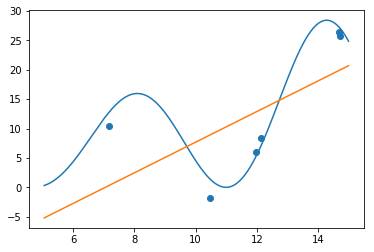

In [11]:
_=plt.scatter(X, y)
_=plt.plot(X_truth, y_truth)
_=plt.plot(X_truth, y_pred.T)

#### regression by up to 5-dimensional polynomials and nonlinear functions

Here we introduce nonlinear transformation $\phi_{i}(x)=x^{i}$ and other nonlinear functions.

In [12]:
X_5d = np.concatenate((X, X**2, X**3, X**4, X**5), axis=1)
X_nlf = np.concatenate((X, X**2, np.log(X), X**3, np.sin(X), np.cos(X), 1/X), axis=1)
X_truth_5d = np.concatenate((X_truth, X_truth**2, X_truth**3, X_truth**4, X_truth**5), axis=1)
X_truth_nlf = np.concatenate((X_truth, X_truth**2, np.log(X_truth),
                             X_truth**3, np.sin(X_truth), np.cos(X_truth),
                             1/X_truth), axis=1)

In [13]:
lr_5 = LinearRegressor()
lr_nlf = LinearRegressor()

In [14]:
lr_5.fit(X_5d.T, y)
lr_nlf.fit(X_nlf.T, y)

In [15]:
y_pred_5 = lr_5.predict(X_truth_5d.T)
y_pred_nlf = lr_nlf.predict(X_truth_nlf.T)

(-20, 50)

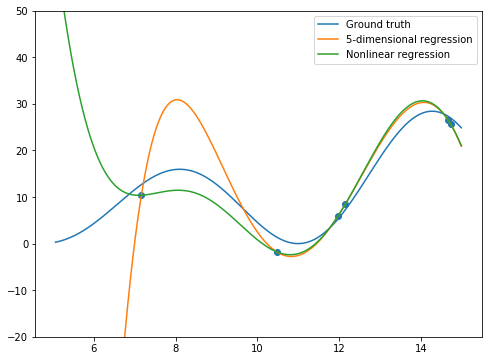

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y)
ax.plot(X_truth, y_truth, label="Ground truth")
ax.plot(X_truth, y_pred_5.T, label="5-dimensional regression")
ax.plot(X_truth, y_pred_nlf.T, label="Nonlinear regression")
_ = ax.legend()
ax.set_ylim(-20,50)

Both regression curve pass through data points, they dos not fit the ground truth curve at $x<10$.

In [17]:
print(lr_5.w)
print(lr_nlf.w)

[[ 4.82746260e+03]
 [-8.22479618e+02]
 [ 6.77862889e+01]
 [-2.70299577e+00]
 [ 4.17176610e-02]
 [-1.09522630e+04]]
[[-8.35338163e+01]
 [ 6.34713359e+00]
 [ 8.13670322e+02]
 [-2.24766642e-01]
 [ 1.37839502e+01]
 [-4.52473925e+00]
 [ 5.03694005e+03]
 [-1.94731319e+03]]


Coefficients for $x^4$ and $1/x$ are large. This might be one cause of overfitting.

## 3. Ridge Regression

### 3-1. Derivation

For evade overfitting, we can introduce various penalty term for $\mathbf{w}$.
In Ridge regression, we introduce $L^2$ penalty as 

$$
\begin{align}
    \hat{\mathbf{w}} &= \arg\min \|\mathbf{y}-\hat{\mathbf{y}}\|^2 + \alpha\|\mathbf{w}\|^2\\
                     &= \arg\min \mathbf{w}^{\mathsf{T}}(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\alpha\mathrm{I})\mathbf{w}
                                 -2\mathbf{w}^{\mathsf{T}}\mathrm{X}\mathbf{y} + \mathbf{y}^{\mathsf{T}}\mathbf{y}.\\
\end{align}
$$

Then, we can easily get optimum value of $\mathbf{w}$ in the same way:

$$\hat{\mathbf{w}} = (\mathrm{X}\mathrm{X}^{\mathsf{T}}+\alpha\mathrm{I})^{-1}\mathrm{X}\mathbf{y}.$$

### 3-2. Implementation

regression by 3- and 7-dimensional polynomials

In [18]:
class RidgeRegressor(LinearRegressor):
    def __init__(self, alpha=1e0, biased=True):
        super().__init__(biased)
        self.alpha=alpha
        
    def calc_XXT(self, X):
        return X@X.T + self.alpha * np.eye(self.ndim)

In [51]:
rr_nlf = RidgeRegressor(alpha=1e-1)
rr_nlf2 = RidgeRegressor(alpha=1e0)
rr_nlf3 = RidgeRegressor(alpha=1e1)

In [52]:
rr_nlf.fit(X_nlf.T, y)
rr_nlf2.fit(X_nlf.T, y)
rr_nlf3.fit(X_nlf.T, y)

In [53]:
y_pred_nlf_ridge = rr_nlf.predict(X_truth_nlf.T)
y_pred_nlf_ridge2 = rr_nlf2.predict(X_truth_nlf.T)
y_pred_nlf_ridge3 = rr_nlf3.predict(X_truth_nlf.T)

(-5, 30)

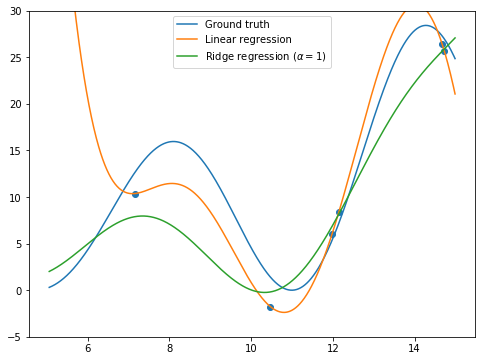

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y)
ax.plot(X_truth, y_truth, label="Ground truth")
ax.plot(X_truth, y_pred_nlf.T, label="Linear regression")
# ax.plot(X_truth, y_pred_nlf_ridge.T, label=r"Ridge regression ($\alpha=0.01$)")
ax.plot(X_truth, y_pred_nlf_ridge2.T, label=r"Ridge regression ($\alpha=1$)")
# ax.plot(X_truth, y_pred_nlf_ridge3.T, label=r"Ridge regression ($\alpha=100$)")
_ = ax.legend()
ax.set_ylim(-5, 30)

Overfitting seems be more moderate.

In [55]:
print(lr_nlf.w)
print(rr_nlf.w)

[[-8.35338163e+01]
 [ 6.34713359e+00]
 [ 8.13670322e+02]
 [-2.24766642e-01]
 [ 1.37839502e+01]
 [-4.52473925e+00]
 [ 5.03694005e+03]
 [-1.94731319e+03]]
[[ 3.31128957]
 [-0.74849659]
 [ 1.47504391]
 [ 0.04112259]
 [ 5.53142661]
 [ 2.25508528]
 [ 0.21272708]
 [ 1.02517274]]


(-5, 30)

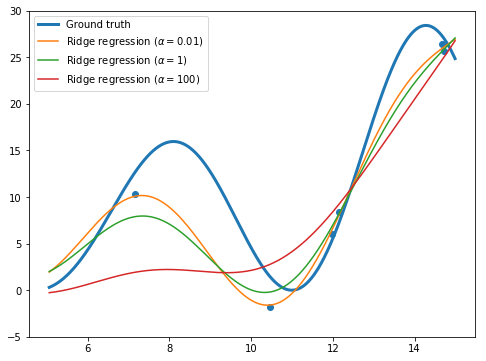

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y)
ax.plot(X_truth, y_truth, linewidth=3, label="Ground truth")
ax.plot(X_truth, y_pred_nlf_ridge.T, label=r"Ridge regression ($\alpha=0.01$)")
ax.plot(X_truth, y_pred_nlf_ridge2.T, label=r"Ridge regression ($\alpha=1$)")
ax.plot(X_truth, y_pred_nlf_ridge3.T, label=r"Ridge regression ($\alpha=100$)")
_ = ax.legend()
ax.set_ylim(-5, 30)

Changing $\alpha$, we can control contribution of fitness and norm constraints to loss function.

Using ridge regression, we can get better regresssion.  
...But, how we should decide nonlinear functions? And how many?

*Kernel regression**, which utilizes kernel method, solves these problems in a sophisticated way.

## 4. Kernel regression

### 4-1. Applying kernel method to linear regression

Now let's specify nonlinear transformation of Euclidean vector into feature space:

$$
\begin{align}
    \mathrm{X} &= (\mathbf{x}_{1}\; \mathbf{x}_{2} \cdots \mathbf{x}_{n})\in\mathbb{R}^{s \times n},\\
    \Phi       &= (\phi(\mathbf{x}_{1}),\; \phi(\mathbf{x}_{2}), \cdots, \phi(\mathbf{x}_{n}))^{\mathsf{T}}\in\mathbb{F}^{n},
\end{align}
$$

where $\mathbb{F}$ is a (high-dimensional) feature space and $\phi:\mathbb{R}^{s}\to\mathbb{F}$ is a nonlinear function which maps input space data $\mathbf{x}_{i}$ to $\mathbb{F}$.

Strictly speaking, $\mathbb{F}$ should be a reproducing kernel Hilbert space (RKHS), but we do not expand a detailed discussion on characteristics of RKHS here.

Then we construct a prediction model as

$$
    y_{i} = \langle \mathbf{w}, \phi(\mathbf{x}_{i}) \rangle
$$

where $\mathbf{w}\in\mathbb{F}$ and $\langle \cdot, \cdot \rangle$ is the inner product in $\mathbb{F}$.

We can estimate $\mathbf{w}$ by minimizing discrepancy between $y_{i}$ and $\langle \mathbf{w}, \phi(\mathbf{x}_{i}) \rangle$:

$$
    l(\mathbf{w}) := \sum_{i=1}^{n}(y_{i}-\langle\mathbf{w},\phi(\mathbf{x}_{i})\rangle)^2.
$$

Let $\mathbb{F}=\mathbb{F}_{0}\oplus\mathbb{F}_{\perp}$ is a direct sum decomposition, $\mathbb{F}_{0}=\mathrm{span}\left\{\phi(\mathbf{x}_{i})\right\}_{i}$, and $\mathbb{F}_{\perp}$ is an orthogonal complement of $\mathbb{F}_{0}$.  
Then, $\mathbf{w}\in\mathbb{F}$ can be written in the form below:

$$
    \mathbf{w} = \sum_{i=1}^{n}c_{i}\phi(\mathbf{x}_{i}) + \mathbf{w}_{\perp},
$$

where $c_i\in\mathbb{R}$ and $\mathbf{w}_{\perp}\in\mathbb{F}_{\perp}$. Let's use a notation $\sum_{i=1}^{n}c_{i}\phi(\mathbf{x}_{i})=\mathbf{c}^{\mathsf{T}}\Phi$.

Since $\mathbf{w}_{\perp}$ does not affect the value of $l(\mathbf{w})$, we set $\mathbf{w}_{\perp}=\mathbf{0}$.
So, the estimation problem boils down to optimization of coefficients $c_i$.

$$
\begin{align}
    l(\mathbf{w}) &= \sum_{i=1}^{n}\left(y_{i}-\left\langle \sum_{j=1}^{n}c_{j}\phi(\mathbf{x}_{j}), \phi(\mathbf{x}_{i}) \right\rangle\right)^2\\
                  &= \sum_{i=1}^{n}\left(y_{i}-\sum_{j=1}^{n}c_{j}\left\langle \phi(\mathbf{x}_{j}), \phi(\mathbf{x}_{i}) \right\rangle\right)^2\\
                  &= \|\mathbf{y}-\mathrm{K}\mathbf{c}\|^2,
\end{align}
$$

where $K_{ij}=\langle \phi(\mathbf{x}_{i}), \phi(\mathbf{x}_{j}) \rangle$.

Minimization of $l(\mathbf{w})$ comes down to ordinary least square regression and it gives the solution as

$$
    \hat{\mathbf{c}}=\mathrm{K}^{-1}\mathbf{y}.
$$

The optimum value of $\mathbf{w}$ is

$$
    \hat{\mathbf{w}} = \hat{\mathbf{c}}^{\mathsf{T}}\Phi = \mathbf{y}^{\mathsf{T}}\mathrm{K}^{-1}\Phi.
$$

Also, we can predict $y$ for a new input $\mathbf{x}^{\ast}$

$$
\begin{align}
    y^{\ast} &= \left\langle \hat{\mathbf{w}}, \phi(\mathbf{x}^{\ast}) \right\rangle\\
             &= \left\langle \mathbf{y}^{\mathsf{T}}\mathrm{K}^{-1}\Phi, \phi(\mathbf{x}^{\ast}) \right\rangle\\
             &= \mathbf{y}^{\mathsf{T}}\mathrm{K}^{-1}\mathbf{k}(\mathbf{x}^{\ast})
\end{align}
$$

where $\mathbf{k}(\mathbf{x}^{\ast}):=(\langle\phi(\mathbf{x}_{1}), \phi(\mathbf{x}^{\ast})\rangle \cdots \langle\phi(\mathbf{x}_{n}), \phi(\mathbf{x}^{\ast})\rangle)^{\mathsf{T}}$.

### 4-2. Applying kernel method ridge regression

---

But actually, under noisy model $y_{\mathrm{obs}}=x_{\mathrm{truth}}+e; e\sim\mathcal{N}(0, \sigma^2)$, observation will be in the blue area below with some certainty.

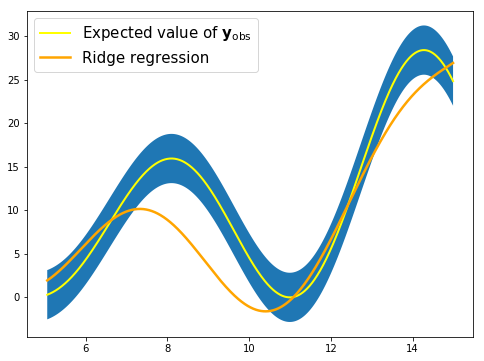

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X_truth, y_truth, c="yellow", linewidth=2, label=r"Expected value of $\mathbf{y}_{\mathrm{obs}}$")
ax.fill_between(X_truth[:, 0], y_truth[:, 0] + 2*np.sqrt(2), y_truth[:, 0] - 2*np.sqrt(2)) # 95 percent confidence interval 
ax.plot(X_truth, y_pred_nlf_ridge.T, c="orange", linewidth=2.5, label="Ridge regression")
ax.legend(fontsize=15)

At least we want to predict $y$ and obtain its degree of confidence: in above example, we want know which predicted values are more uncertain. How can we do it?

## 5. Bayesian Regression

### 5-1. Derivation

Linear regression and Ridge regression can be interpreted as maximum likelihood estimation under equi-variance Gaussian assumption:

$$
y|\mathbf{w},\mathbf{x} \sim \mathcal{N}(\mathbf{w}^{\mathsf{T}}\mathbf{x}, \sigma^2).\tag{3}
$$

This is because MLE of $\mathbf{w}$ under this assumption becomes as follows:

$$
\begin{align}
    \hat{\mathbf{w}}_{\mathrm{MLE}} &= \arg\max\sum_{i=1}^{n}\log p(y_i|\mathbf{x}_i, \mathbf{w})\\
                                    &= \arg\max_{\mathbf{w}}\sum_{i=1}^{n}\frac{-(y_i-\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)^2}{2\sigma^2} + \mathrm{const.},
\end{align}
$$ 

where $\mathrm{const.}$ includes terms independent of $\mathbf{w}$, which is equivalent to former formulation.

We want do is not only to obtain a point estimator of $\mathbf{w}$ but also to estimate condence interval, and further, distribution of $\mathbf{w}$.

So, we introduce prior distribution for $\mathbf{w}$:

$$
    \mathbf{w} \sim \mathcal{N}(\mathbf{0}, \mathrm{\Sigma}),
$$

which is independent of $\mathrm{X}$. Incorporating this with eq. (3), we can calculate **posterior distribution of $\mathbf{w}$** under observation of $\mathbf{y}$:

$$
\begin{align}
    \log p(\mathbf{w}|\mathbf{y}, \mathrm{X}) &\propto \log p(\mathbf{w}) + \log p(\mathbf{y}|\mathbf{w},\mathrm{X})\\
                                         &=\log p(\mathbf{w}) + \sum_{i=1}^{n} \log p(y_i|\mathbf{w},\mathbf{x}_i)\\
                                         &=-\frac{1}{2}\mathbf{w}^{\mathsf{T}}\mathrm{\Sigma}^{-1}\mathbf{w}
                                           -\sum_{i=1}^{n} \frac{(y_i-\mathbf{w}^{\mathsf{T}}\mathbf{x}_i)^2}{2\sigma^2}\\
                                         &=-\frac{1}{2}\mathbf{w}^{\mathsf{T}}\mathrm{\Sigma}^{-1}\mathbf{w}
                                           -\frac{1}{2\sigma^2}\mathbf{w}^{\mathsf{T}}\left(\sum_{i=1}^{n}\mathbf{x}_i\mathbf{x}_i^{\mathsf{T}}\right)\mathbf{w}
                                           +\frac{1}{\sigma^2}\mathbf{w}^{\mathsf{T}}\left(\sum_{i=1}^{n}y_i\mathbf{x}_i\right)+\mathrm{const.}\\
                                         &=-\frac{1}{2\sigma^2}\left(\mathbf{w}-(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}\right)^{\mathsf{T}}
                                           \left(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1}\right)
                                           \left(\mathbf{w}-(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}\right)+\mathrm{const.}.
\end{align}
$$

Therefore, now we know prior distribution of $\mathbf{w}$ is

$$
    \mathbf{w}|\mathbf{y}, \mathrm{X} \sim \mathcal{N}\left((\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}, \left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\right).
$$

Using this probability, we get distribution of predicted value $y^{\ast}=\mathbf{w}^{\mathsf{T}}\mathbf{x}^{\ast}$ at new input point $\mathbf{x}^{\ast}$:

$$
    y^{\ast}|\mathbf{x}^{\ast}, \mathbf{y}, \mathrm{X} \sim \mathcal{N}\left(\mathbf{y}^{\mathsf{T}}\mathrm{X}^{\mathsf{T}}(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathbf{x}^{\ast},
                                                            (\mathbf{x}^{\ast})^{\mathsf{T}}\left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\mathbf{x}^{\ast}\right)
$$

Our goal is achieved: 95 % confidence interval of $y^{\ast}$ is

$$
\begin{align}
  &\left(m_{\mathbf{w}}-2\sigma_{\mathbf{w}}, m_{\mathbf{w}}+2\sigma_{\mathbf{w}}\right);\\
  & m_{\mathbf{w}} = \mathbf{y}^{\mathsf{T}}\mathrm{X}^{\mathsf{T}}(\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathbf{x}^{\ast},\\
  & \sigma_{\mathbf{w}}^2 = (\mathbf{x}^{\ast})^{\mathsf{T}}\left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\mathbf{x}^{\ast}.
\end{align}
$$

Now, let's do formula deformation so that we can generalize it to **kernel regression**.

Sherman-Morrison-Woodbury's formura states that for any matrices $\mathrm{A}\in\mathbb{R}^{m \times m}, \mathrm{B}\in\mathbb{R}^{m \times n}, \mathrm{C}\in\mathbb{R}^{n \times m}$ and $\mathrm{D}\in\mathbb{R}^{n \times n}$, if $\mathrm{A}$, $\mathrm{D}$, and $(\mathrm{A}+\mathrm{B}\mathrm{D}\mathrm{C})$ are invertible, equation below holds:

$$
    (\mathrm{A}+\mathrm{B}\mathrm{D}\mathrm{C})^{-1} = \mathrm{A}^{-1} - \mathrm{A}^{-1}\mathrm{B}\mathrm{D}
        (\mathrm{D}+\mathrm{D}\mathrm{C}\mathrm{A}^{-1}\mathrm{B}\mathrm{D})^{-1}\mathrm{D}\mathrm{C}\mathrm{A}^{-1}.
$$

Using this formula, we can expand $\left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}$ as

$$
\begin{align}
    \left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1} =
       \Sigma - \frac{1}{\sigma^2}\Sigma\mathrm{X}\left(\mathrm{I}+\frac{1}{\sigma^2}\mathrm{X}^{\mathsf{T}}
       \Sigma\mathrm{X}\right)^{-1}\mathrm{X}^{\mathsf{T}}\Sigma\tag{4}
\end{align}
$$

by setting

$$
\begin{align}
    \mathrm{A} &= \Sigma^{-1},\\
    \mathrm{B} &= \frac{1}{\sigma^2}\mathrm{X},\\
    \mathrm{C} &= \mathrm{X},\\
    \mathrm{D} &= \mathrm{I}.
\end{align}
$$

We can express $m_{\mathbf{w}}$ and $\sigma_{\mathbf{w}}$ in a different way using eq. (4):

$$
\begin{align}
    m_{\mathbf{w}} &= \frac{1}{\sigma^2}\mathbf{y}^{\mathsf{T}}\mathrm{X}^{\mathsf{T}}\Sigma\mathbf{x}^{\ast}
        - \frac{1}{\sigma^4}\mathbf{y}^{\mathsf{T}}\mathrm{X}^{\mathsf{T}}\Sigma\mathrm{X}
        \left(\mathrm{I}+\frac{1}{\sigma^2}\mathrm{X}^{\mathsf{T}}\Sigma\mathrm{X}\right)^{-1}\mathrm{X}^{\mathsf{T}}\Sigma\mathbf{x}^{\ast},\\
    \sigma_{\mathbf{w}}^2 &= (\mathbf{x}^{\ast})^{\mathsf{T}}\Sigma\mathbf{x}^{\ast}
        - \frac{1}{\sigma^2}(\mathbf{x}^{\ast})^{\mathsf{T}}\Sigma\mathrm{X}\left(\mathrm{I}
        + \frac{1}{\sigma^2}\mathrm{X}^{\mathsf{T}}\Sigma\mathrm{X}\right)^{-1}\mathrm{X}^{\mathsf{T}}\Sigma\mathbf{x}^{\ast}
\end{align}
$$

Now we only need to calculate $(\mathbf{x}^{\ast})^{\mathsf{T}}\Sigma\mathbf{x}^{\ast}, \mathrm{X}^{\mathsf{T}}\Sigma\mathbf{x}^{\ast}, 
    \mathrm{X}^{\mathsf{T}}\Sigma\mathrm{X}$, matrix inversion of $\mathrm{X}^{\mathsf{T}}\Sigma\mathrm{X}$, and inner product of
    $\mathrm{X}^{\mathsf{T}}\Sigma\mathbf{x}^{\ast}$ and $\mathbf{y}$.

Let's implement this.

### 5-2. implementation

$$
    \mathbf{w}|\mathbf{y}, \mathrm{X} \sim \mathcal{N}\left((\mathrm{X}\mathrm{X}^{\mathsf{T}}+\sigma^2\Sigma^{-1})^{-1}\mathrm{X}\mathbf{y}, \left(\Sigma^{-1}+\frac{1}{\sigma^2}\mathrm{X}\mathrm{X}^{\mathsf{T}}\right)^{-1}\right).
$$

In [26]:
class BayesianRegressor():
    def __init__(self, biased=True, y_var=1.0):
        self.biased = biased
        self.y_var=y_var
    
    def set_prior(self, cov=None, var=1.0, X=None):
        """
        set covariance matrix of prior distribution of w
        """
        if cov is not None:
            assert (np.linalg.eig(cov)[0]>0).all()
            self.prior_cov = cov
        
        elif X is not None:
            dim, n_samp = X.shape
            if self.biased:
                dim += 1
            self.prior_cov = var * np.eye(dim)
    
    def calc_XXT(self, X):
        return X@X.T
    
    def fit(self, X, y):
        dim, n_samp = X.shape
        assert y.shape == (n_samp, 1)
        if self.biased:
            X_ = np.concatenate((X, np.ones((1, n_samp))))
        else:
            X_ = X.copy()
        dim = X_.shape[0]
        assert dim == self.prior_cov.shape[0]
        self.ndim = X_.shape[0]
        self.n_samp = X_.shape[1]
        
        # calc mean of posterior distribution of w
        XTsigX = X_.T @ self.prior_cov @ X_
        sigX = self.prior_cov @ X_
        i_xsigx = np.eye(self.n_samp) + 1/self.y_var * XTsigX
        
        self.posterior_mean \
                        = 1 / self.y_var * sigX @ y \
                        - 1/(self.y_var**2) * sigX @ \
                        np.linalg.solve(i_xsigx, XTsigX @ y)

        # calc covariance of posterior
        self.posterior_cov = self.prior_cov \
                - 1/self.y_var * self.prior_cov @ X_ \
                @ np.linalg.inv(i_xsigx)@ X_.T @ self.prior_cov
        
        
    def predict(self, X):
        dim, n_samp = X.shape
        if self.biased:
            X_ = np.concatenate((X, np.ones((1, n_samp))))
        else:
            X_ = X.copy()
        assert self.ndim == X_.shape[0]
        pred_mean = self.posterior_mean.T @ X_
        pred_cov = np.einsum('ni,ij,jn->n', X_.T, self.posterior_cov, X_)
        return pred_mean, pred_cov

In [27]:
br_nlf = BayesianRegressor(y_var=1)

In [28]:
br_nlf.set_prior(X=X_nlf.T, var=10**(1))

In [29]:
br_nlf.fit(X_nlf.T, y)

In [30]:
y_pred_nlf_bayes_mean, y_pred_nlf_bayes_var = br_nlf.predict(X_truth_nlf.T)

(-10, 30)

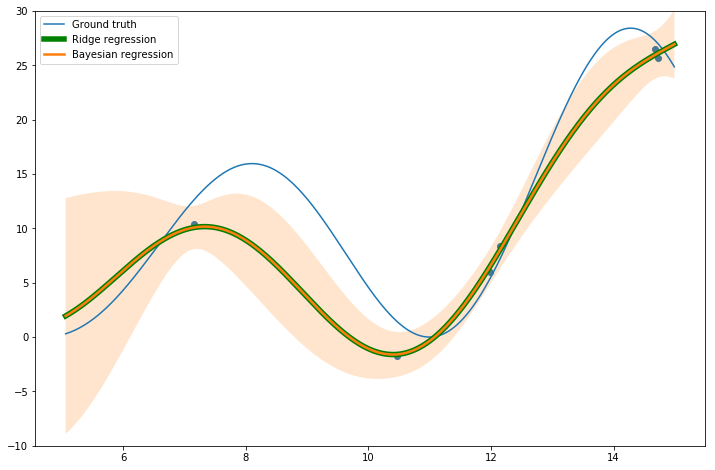

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.plot(X_truth, y_truth, label="Ground truth")
ax.plot(X_truth, y_pred_nlf_ridge.T, c="green", linewidth=5.5, label="Ridge regression")
ax.plot(X_truth, y_pred_nlf_bayes_mean.T, linewidth=2.5, label="Bayesian regression")
ax.fill_between(X_truth[:, 0],
                y_pred_nlf_bayes_mean[0, :] + 2*np.sqrt(y_pred_nlf_bayes_var),
                y_pred_nlf_bayes_mean[0, :] - 2*np.sqrt(y_pred_nlf_bayes_var),
                alpha=0.2) # 95 percent confidence interval 
_ = ax.legend(loc="upper left")
ax.set_ylim(-10, 30)

We get confidence interval for each $x$.
We can see the confidence intervals at $x<10$ are a bit wide.

Before finishing the notebook, let me mention imperfect side of the Bayesian regression explained above:

* choice of hyperparameter  
    For example, we shoud determine $\Sigma=\sigma_{\mathbf{w}}^2\mathrm{I}$, but we do not know how to decide $\sigma_{\mathbf{w}}^2$ because $\mathbf{w}$ is unknown.
* choice of nonlinear feature  
    In the above experiments, we used polynomials $x^{i}$ and some nonlinear functions.
    However, in general, we do not have any prior information about which and how many functions to use.

To overcome these problems, some methods are developed.

* choice of hyperparameter -> Bayesian hierarchical model
* choice of nonlinear feature -> Kernel regression, Gaussian process regression

**-- future topics --**
* Kernel regression
* Gaussian process regression